# Data Analysis

## Imports

In [59]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Loading the Data

In [60]:
model_df = pd.read_csv('../data/final_data.csv')
model_df


,Price_per_m²,Online_since_in_h,WG_Size,Total_People,Size,Warm_Rent_in_€,Cold_Rent_in_€,Deposit_in_€,Roomsize in m²,Appartmentsize in m²,...,Construction_Year,Parking,Floor,Smoking,Garden_Balcony,Dist_center_in_km,Title_Length,Description_Length,Fact_Count,Population_per_km²
0,27.823529,1,2,1,17m²,473.0,393,982.0,17,55.0,...,NaN,Bewohnerparken,2,Rauchen nicht erwünscht,NaN,3.7,21,1179.0,36,11259.96
1,50.000000,1,2,1,12m²,600.0,600,900.0,12,NaN,...,NaN,NaN,0,Rauchen nicht erwünscht,Balkon,2.7,58,1443.0,31,12150.68
2,40.000000,1,2,1,20m²,800.0,800,500.0,20,84.0,...,NaN,Bewohnerparken,1,Rauchen teilweise erlaubt,Balkon,3.4,38,505.0,30,6467.99
3,29.285714,1,5,2,28m²,820.0,720,1440.0,28,NaN,...,NaN,NaN,0,NaN,Garten,5.4,25,2568.0,28,3283.34
4,41.666667,1,3,2,12m²,500.0,500,250.0,12,NaN,...,NaN,gute Parkmöglichkeiten,1,NaN,Balkon,4.0,61,1421.0,34,5048.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,16.666667,1344,2,0,60m²,1000.0,850,250.0,60,NaN,...,NaN,gute Parkmöglichkeiten,2,NaN,Balkon,3.2,31,1642.0,33,11677.08
1023,42.941176,1344,4,3,17m²,730.0,680,200.0,17,70.0,...,NaN,NaN,1,Rauchen teilweise erlaubt,NaN,2.7,36,1402.0,28,12311.83
1024,4.000000,1368,2,1,10m²,40.0,40,0.0,10,47.0,...,1964.0,gute Parkmöglichkeiten,0,Rauchen nicht erwünscht,NaN,3.6,74,766.0,35,3446.98
1025,24.347826,1368,3,2,23m²,560.0,490,NaN,23,NaN,...,NaN,NaN,2,Rauchen teilweise erlaubt,Balkon,3.4,55,641.0,24,7241.29


## Further Filtering

### Removing unlikely appartments


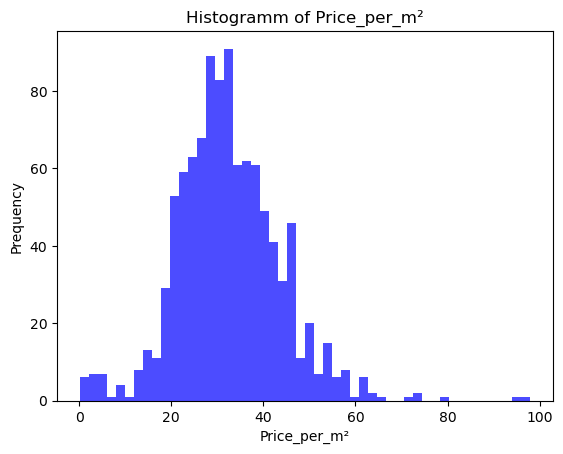

In [61]:
plt.hist(model_df['Price_per_m²'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histogramm of Price_per_m²')
plt.xlabel('Price_per_m²')
plt.ylabel('Prequency')

plt.show()

In dem Histogramm ist erkennbar, dass einige Datenwerte nicht aus normalen Vermietungen resultieren. Nach Prüfung der Werte konnte festgestellt werden, dass teilweise die Preise pro Nacht angegeben wurden oder für ein Wochenende, da eine WG-GESUCHT.de auch zur kurzzeitigen Untermiete verwendet wird. Um diese Datensätze zu bereinigen, sowie Datensätze die sinnlose Angaben beinhalten, wird erneut gefiltert.
Datensätze mit einer Warm-Miete von unter 300€ werden entfernt, weil davon ausgegangen wird, dass es sich hierbei nicht um monatsmieten handelt. Weiterhin werden Datensätze mit Price_per_m² ANgaben kleiner als 15 ebenfalls entfernt. Bei einem Großem Raum von 20m² entspricht die untere Grenze hier 300€. Aufgrund der geringen Verfügbarkeit von Datensätzen mit Price_per_m² größer als 70 werden auch diese entfernt.

In [62]:
filtered_df = model_df[(model_df['Price_per_m²'] >= 15) & (model_df['Price_per_m²'] <= 70) & (model_df['Warm_Rent_in_€'] >= 300)].copy()

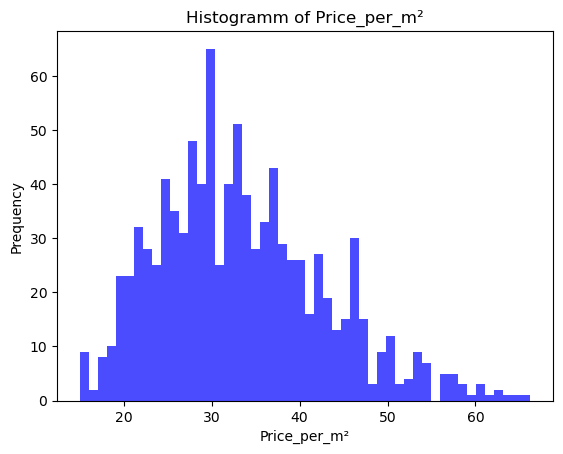

In [63]:
plt.hist(filtered_df['Price_per_m²'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histogramm of Price_per_m²')
plt.xlabel('Price_per_m²')
plt.ylabel('Prequency')

plt.show()

### Removing non cologn appartments

Weiterhin wurde festgestellt, dass nicht alle Shared Appartments tatsächlich in Köln liegen. Alle Appartments die nicht auf die Kölner Postleitzahlen und somit zu einer Rheinseite gemappt werden konnten, wurden daher gelöscht.

In [64]:
filtered_df = filtered_df.dropna(subset=['left_rhine_side'])

Es verbleiben x Zeilen

### Dropping wrong Floor entrys

In [65]:
filtered_df = filtered_df[filtered_df['Floor'] != 'Dachgeschoss']
filtered_df = filtered_df[filtered_df['Floor'] != 'höher als 5']


### Checking for nan values


In [66]:
filtered_df.isnull().sum()

Price_per_m²                    0
Online_since_in_h               0
WG_Size                         0
Total_People                    0
Size                            0
Warm_Rent_in_€                  0
Cold_Rent_in_€                  0
Deposit_in_€                  193
Roomsize in m²                  0
Appartmentsize in m²          228
Intermediate Rent               0
left_rhine_side                 0
Weighted_Average_Sentiment      0
Min_Age                       109
Max_Age                       109
Construction_Year             834
Parking                       347
Floor                         127
Smoking                       277
Garden_Balcony                393
Dist_center_in_km               0
Title_Length                    0
Description_Length              0
Fact_Count                      0
Population_per_km²              0
dtype: int64

In [67]:
# Removing Construction Year as it has too many missing values
if 'Construction_Year' in filtered_df.columns:
    filtered_df = filtered_df.drop(columns=['Construction_Year'])

In [68]:
filtered_df

,Price_per_m²,Online_since_in_h,WG_Size,Total_People,Size,Warm_Rent_in_€,Cold_Rent_in_€,Deposit_in_€,Roomsize in m²,Appartmentsize in m²,...,Max_Age,Parking,Floor,Smoking,Garden_Balcony,Dist_center_in_km,Title_Length,Description_Length,Fact_Count,Population_per_km²
0,27.823529,1,2,1,17m²,473.0,393,982.0,17,55.0,...,30.0,Bewohnerparken,2,Rauchen nicht erwünscht,NaN,3.7,21,1179.0,36,11259.96
1,50.000000,1,2,1,12m²,600.0,600,900.0,12,NaN,...,30.0,NaN,0,Rauchen nicht erwünscht,Balkon,2.7,58,1443.0,31,12150.68
2,40.000000,1,2,1,20m²,800.0,800,500.0,20,84.0,...,30.0,Bewohnerparken,1,Rauchen teilweise erlaubt,Balkon,3.4,38,505.0,30,6467.99
3,29.285714,1,5,2,28m²,820.0,720,1440.0,28,NaN,...,35.0,NaN,0,NaN,Garten,5.4,25,2568.0,28,3283.34
4,41.666667,1,3,2,12m²,500.0,500,250.0,12,NaN,...,25.0,gute Parkmöglichkeiten,1,NaN,Balkon,4.0,61,1421.0,34,5048.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,23.125000,1320,2,1,16m²,370.0,300,400.0,16,79.0,...,50.0,NaN,2,Rauchen teilweise erlaubt,Balkon,4.0,83,4392.0,38,7191.28
1021,35.714286,1320,2,1,14m²,500.0,500,1000.0,14,100.0,...,50.0,Bewohnerparken,3,Rauchen nicht erwünscht,Gartenmitbenutzung,3.4,70,2113.0,48,3446.98
1022,16.666667,1344,2,0,60m²,1000.0,850,250.0,60,NaN,...,NaN,gute Parkmöglichkeiten,2,NaN,Balkon,3.2,31,1642.0,33,11677.08
1023,42.941176,1344,4,3,17m²,730.0,680,200.0,17,70.0,...,27.0,NaN,1,Rauchen teilweise erlaubt,NaN,2.7,36,1402.0,28,12311.83


### Filtering columns

In [69]:
price_df = filtered_df.drop(['Warm_Rent_in_€', 'Cold_Rent_in_€', 'Roomsize in m²', 'Size'], axis=1) # droping, because they are related to the target variable
price_df = price_df.drop(['Total_People'], axis=1)                                                  # droping, because it is related to Wg_size
price_df = price_df.drop(['Online_since_in_h'], axis=1)                                             # droping, because it is not relvant for the target variable
price_df

,Price_per_m²,WG_Size,Deposit_in_€,Appartmentsize in m²,Intermediate Rent,left_rhine_side,Weighted_Average_Sentiment,Min_Age,Max_Age,Parking,Floor,Smoking,Garden_Balcony,Dist_center_in_km,Title_Length,Description_Length,Fact_Count,Population_per_km²
0,27.823529,2,982.0,55.0,True,1.0,0.828058,20.0,30.0,Bewohnerparken,2,Rauchen nicht erwünscht,NaN,3.7,21,1179.0,36,11259.96
1,50.000000,2,900.0,NaN,True,1.0,0.993400,30.0,30.0,NaN,0,Rauchen nicht erwünscht,Balkon,2.7,58,1443.0,31,12150.68
2,40.000000,2,500.0,84.0,True,1.0,0.599400,20.0,30.0,Bewohnerparken,1,Rauchen teilweise erlaubt,Balkon,3.4,38,505.0,30,6467.99
3,29.285714,5,1440.0,NaN,False,1.0,0.945505,25.0,35.0,NaN,0,NaN,Garten,5.4,25,2568.0,28,3283.34
4,41.666667,3,250.0,NaN,True,1.0,0.803016,25.0,25.0,gute Parkmöglichkeiten,1,NaN,Balkon,4.0,61,1421.0,34,5048.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,23.125000,2,400.0,79.0,True,0.0,0.955097,23.0,50.0,NaN,2,Rauchen teilweise erlaubt,Balkon,4.0,83,4392.0,38,7191.28
1021,35.714286,2,1000.0,100.0,False,0.0,0.721486,31.0,50.0,Bewohnerparken,3,Rauchen nicht erwünscht,Gartenmitbenutzung,3.4,70,2113.0,48,3446.98
1022,16.666667,2,250.0,NaN,True,1.0,0.856763,NaN,NaN,gute Parkmöglichkeiten,2,NaN,Balkon,3.2,31,1642.0,33,11677.08
1023,42.941176,4,200.0,70.0,True,1.0,0.963600,20.0,27.0,NaN,1,Rauchen teilweise erlaubt,NaN,2.7,36,1402.0,28,12311.83


In [70]:
duration_df = filtered_df.drop(['Warm_Rent_in_€', 'Cold_Rent_in_€', 'Roomsize in m²', 'Size'], axis=1)    # droping, because they are related to Price_per_m²
duration_df = duration_df.drop(['Total_People'], axis=1)                                                  # droping, because it is related to Wg_size

# Define new order of columns
new_order = ['Online_since_in_h', 'Price_per_m²', 'WG_Size', 'Deposit_in_€', 'Appartmentsize in m²',
            'Intermediate Rent', 'left_rhine_side', 'Weighted_Average_Sentiment',
            'Min_Age', 'Max_Age', 'Parking', 'Floor',
            'Smoking', 'Garden_Balcony', 'Dist_center_in_km', 'Title_Length',
            'Description_Length', 'Fact_Count', 'Population_per_km²']

duration_df = duration_df[new_order]

duration_df

,Online_since_in_h,Price_per_m²,WG_Size,Deposit_in_€,Appartmentsize in m²,Intermediate Rent,left_rhine_side,Weighted_Average_Sentiment,Min_Age,Max_Age,Parking,Floor,Smoking,Garden_Balcony,Dist_center_in_km,Title_Length,Description_Length,Fact_Count,Population_per_km²
0,1,27.823529,2,982.0,55.0,True,1.0,0.828058,20.0,30.0,Bewohnerparken,2,Rauchen nicht erwünscht,NaN,3.7,21,1179.0,36,11259.96
1,1,50.000000,2,900.0,NaN,True,1.0,0.993400,30.0,30.0,NaN,0,Rauchen nicht erwünscht,Balkon,2.7,58,1443.0,31,12150.68
2,1,40.000000,2,500.0,84.0,True,1.0,0.599400,20.0,30.0,Bewohnerparken,1,Rauchen teilweise erlaubt,Balkon,3.4,38,505.0,30,6467.99
3,1,29.285714,5,1440.0,NaN,False,1.0,0.945505,25.0,35.0,NaN,0,NaN,Garten,5.4,25,2568.0,28,3283.34
4,1,41.666667,3,250.0,NaN,True,1.0,0.803016,25.0,25.0,gute Parkmöglichkeiten,1,NaN,Balkon,4.0,61,1421.0,34,5048.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1320,23.125000,2,400.0,79.0,True,0.0,0.955097,23.0,50.0,NaN,2,Rauchen teilweise erlaubt,Balkon,4.0,83,4392.0,38,7191.28
1021,1320,35.714286,2,1000.0,100.0,False,0.0,0.721486,31.0,50.0,Bewohnerparken,3,Rauchen nicht erwünscht,Gartenmitbenutzung,3.4,70,2113.0,48,3446.98
1022,1344,16.666667,2,250.0,NaN,True,1.0,0.856763,NaN,NaN,gute Parkmöglichkeiten,2,NaN,Balkon,3.2,31,1642.0,33,11677.08
1023,1344,42.941176,4,200.0,70.0,True,1.0,0.963600,20.0,27.0,NaN,1,Rauchen teilweise erlaubt,NaN,2.7,36,1402.0,28,12311.83


## Converting Data Types and Transforming Categorical Variables

### Price Dataframe
- **Garden_Balcony:** Since a balcony or terrace is always a plus for an apartment, it is assumed that if one of the two exists, this will also be stated. Therefore, a 1 is set for all lines that have an entry here and a 0 for all others.
- **Parking:** An assumption like the one with the balcony does not seem to apply here. Therefore, a distinction is made whether it is stated that it is easy to park, which includes own parking spaces, or whether it is difficult to park. NaN values ​​remain and may need to be filtered later.
- **Smoking:** Dummy columns are created for the three categories not allowed, partially allowed and allowed. Rows without information have false in all 3 columns.


In [71]:
# Garden/Balcony
if len(price_df['Garden_Balcony'].unique()) > 2:
    price_df['Garden_Balcony'] = price_df['Garden_Balcony'].notna().astype(int)

# Parking
price_df['Parking'] = price_df['Parking'].replace('schlechte Parkmöglichkeiten', 0).replace('gute Parkmöglichkeiten', 1).replace('Bewohnerparken', 1).replace('eigener Parkplatz', 1).replace('Tiefgaragenstellplatz', 1)

# Smoking
if 'Smoking' in price_df.columns:
    price_df = pd.get_dummies(price_df, columns=['Smoking'])
price_df


,Price_per_m²,WG_Size,Deposit_in_€,Appartmentsize in m²,Intermediate Rent,left_rhine_side,Weighted_Average_Sentiment,Min_Age,Max_Age,Parking,Floor,Garden_Balcony,Dist_center_in_km,Title_Length,Description_Length,Fact_Count,Population_per_km²,Smoking_Rauchen nicht erwünscht,Smoking_Rauchen teilweise erlaubt,Smoking_Rauchen überall erlaubt
0,27.823529,2,982.0,55.0,True,1.0,0.828058,20.0,30.0,1.0,2,0,3.7,21,1179.0,36,11259.96,True,False,False
1,50.000000,2,900.0,NaN,True,1.0,0.993400,30.0,30.0,NaN,0,1,2.7,58,1443.0,31,12150.68,True,False,False
2,40.000000,2,500.0,84.0,True,1.0,0.599400,20.0,30.0,1.0,1,1,3.4,38,505.0,30,6467.99,False,True,False
3,29.285714,5,1440.0,NaN,False,1.0,0.945505,25.0,35.0,NaN,0,1,5.4,25,2568.0,28,3283.34,False,False,False
4,41.666667,3,250.0,NaN,True,1.0,0.803016,25.0,25.0,1.0,1,1,4.0,61,1421.0,34,5048.95,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,23.125000,2,400.0,79.0,True,0.0,0.955097,23.0,50.0,NaN,2,1,4.0,83,4392.0,38,7191.28,False,True,False
1021,35.714286,2,1000.0,100.0,False,0.0,0.721486,31.0,50.0,1.0,3,1,3.4,70,2113.0,48,3446.98,True,False,False
1022,16.666667,2,250.0,NaN,True,1.0,0.856763,NaN,NaN,1.0,2,1,3.2,31,1642.0,33,11677.08,False,False,False
1023,42.941176,4,200.0,70.0,True,1.0,0.963600,20.0,27.0,NaN,1,0,2.7,36,1402.0,28,12311.83,False,True,False


### Duration Dataframe
- **Garden_Balcony:** Since a balcony or terrace is always a plus for an apartment, it is assumed that if one of the two exists, this will also be stated. Therefore, a 1 is set for all lines that have an entry here and a 0 for all others.
- **Parking:** An assumption like the one with the balcony does not seem to apply here. Therefore, a distinction is made whether it is stated that it is easy to park, which includes own parking spaces, or whether it is difficult to park. NaN values ​​remain and may need to be filtered later.
- **Smoking:** Dummy columns are created for the three categories not allowed, partially allowed and allowed. Rows without information have false in all 3 columns.

In [72]:
# Garden/Balcony
if len(duration_df['Garden_Balcony'].unique()) > 2:
    duration_df['Garden_Balcony'] = duration_df['Garden_Balcony'].notna().astype(int)

# Parking
duration_df['Parking'] = duration_df['Parking'].replace('schlechte Parkmöglichkeiten', 0).replace('gute Parkmöglichkeiten', 1).replace('Bewohnerparken', 1).replace('eigener Parkplatz', 1).replace('Tiefgaragenstellplatz', 1)

# Smoking
if 'Smoking' in duration_df.columns:
    duration_df = pd.get_dummies(duration_df, columns=['Smoking'])
duration_df

,Online_since_in_h,Price_per_m²,WG_Size,Deposit_in_€,Appartmentsize in m²,Intermediate Rent,left_rhine_side,Weighted_Average_Sentiment,Min_Age,Max_Age,...,Floor,Garden_Balcony,Dist_center_in_km,Title_Length,Description_Length,Fact_Count,Population_per_km²,Smoking_Rauchen nicht erwünscht,Smoking_Rauchen teilweise erlaubt,Smoking_Rauchen überall erlaubt
0,1,27.823529,2,982.0,55.0,True,1.0,0.828058,20.0,30.0,...,2,0,3.7,21,1179.0,36,11259.96,True,False,False
1,1,50.000000,2,900.0,NaN,True,1.0,0.993400,30.0,30.0,...,0,1,2.7,58,1443.0,31,12150.68,True,False,False
2,1,40.000000,2,500.0,84.0,True,1.0,0.599400,20.0,30.0,...,1,1,3.4,38,505.0,30,6467.99,False,True,False
3,1,29.285714,5,1440.0,NaN,False,1.0,0.945505,25.0,35.0,...,0,1,5.4,25,2568.0,28,3283.34,False,False,False
4,1,41.666667,3,250.0,NaN,True,1.0,0.803016,25.0,25.0,...,1,1,4.0,61,1421.0,34,5048.95,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1320,23.125000,2,400.0,79.0,True,0.0,0.955097,23.0,50.0,...,2,1,4.0,83,4392.0,38,7191.28,False,True,False
1021,1320,35.714286,2,1000.0,100.0,False,0.0,0.721486,31.0,50.0,...,3,1,3.4,70,2113.0,48,3446.98,True,False,False
1022,1344,16.666667,2,250.0,NaN,True,1.0,0.856763,NaN,NaN,...,2,1,3.2,31,1642.0,33,11677.08,False,False,False
1023,1344,42.941176,4,200.0,70.0,True,1.0,0.963600,20.0,27.0,...,1,0,2.7,36,1402.0,28,12311.83,False,True,False


## Correllation

### Price Dataframe

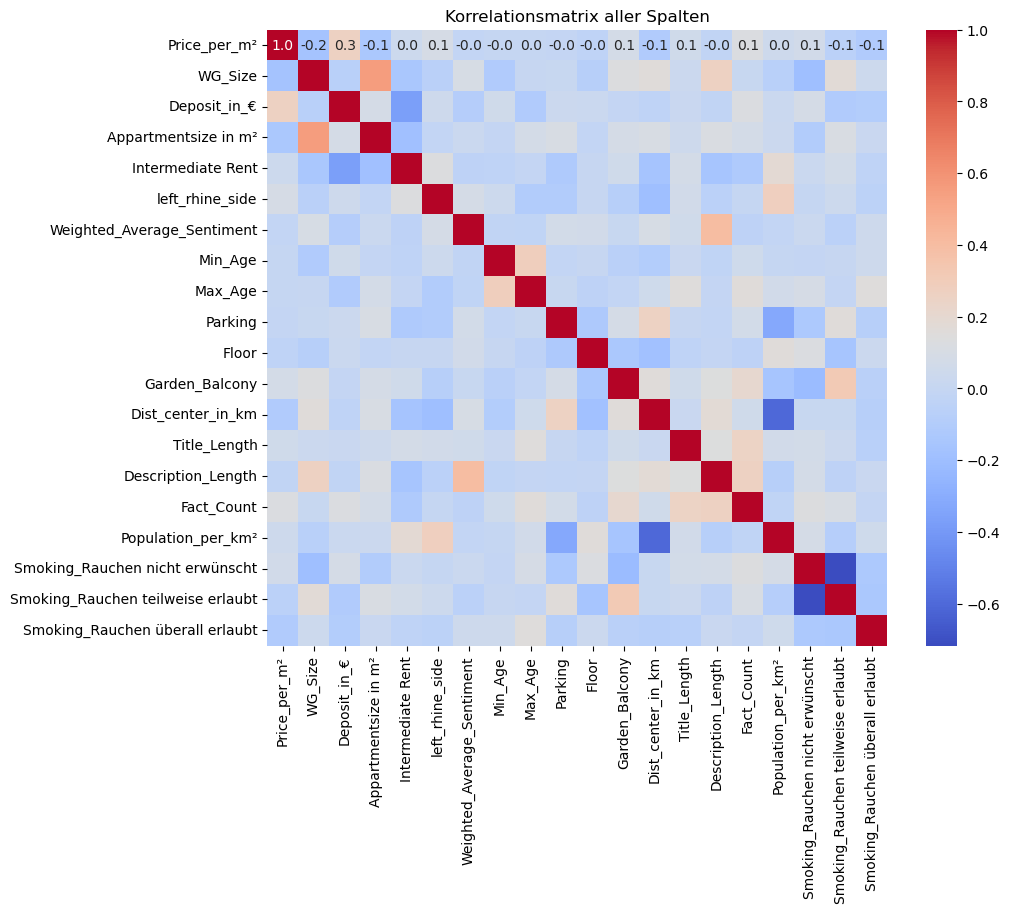

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

price_df_wo_nan = price_df.dropna(axis=0)
price_df_wo_nan = price_df_wo_nan.astype(float)
corr_matrix = price_df_wo_nan.corr()

# Erstellung einer Heatmap für die Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Korrelationsmatrix aller Spalten')
plt.show()


### Duration Dataframe

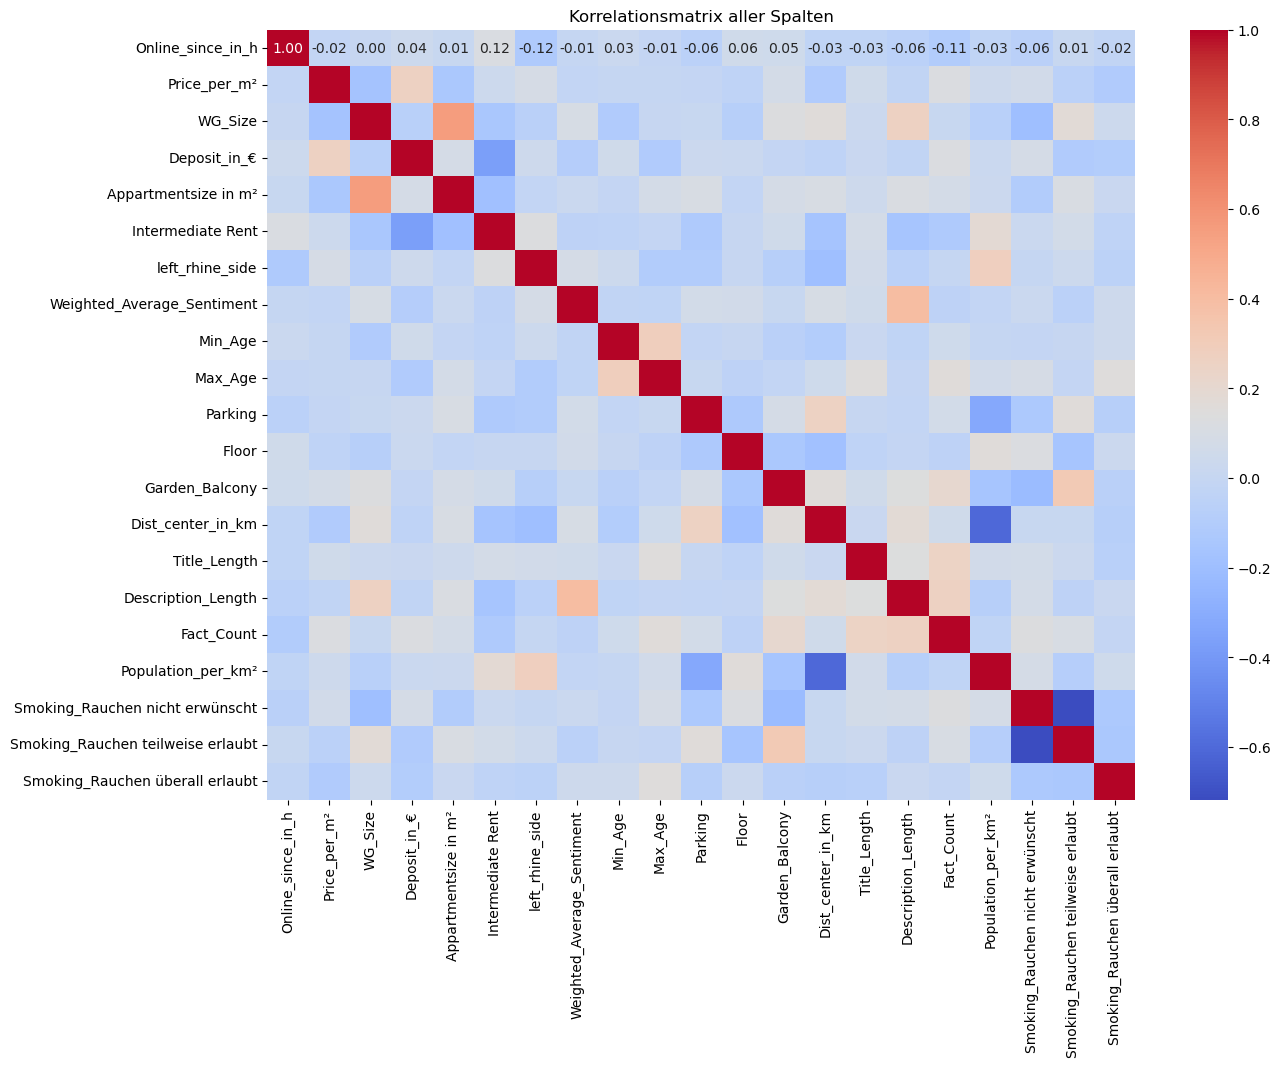

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

duration_df_wo_nan = duration_df.dropna(axis=0)
duration_df_wo_nan = duration_df_wo_nan.astype(float)
duration_corr_matrix = duration_df_wo_nan.corr()

# Erstellung einer Heatmap für die Korrelationsmatrix
plt.figure(figsize=(14, 10))
sns.heatmap(duration_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korrelationsmatrix aller Spalten')
plt.show()

## Regression

### Price Model

In [75]:
X = price_df_wo_nan.drop('Price_per_m²', axis=1)
y = price_df_wo_nan['Price_per_m²']
X = sm.add_constant(X)

price_df_wo_nan_model = sm.OLS(y, X).fit()
price_df_wo_nan_summary = price_df_wo_nan_model.summary()
print(price_df_wo_nan_summary)

                            OLS Regression Results                            
Dep. Variable:           Price_per_m²   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     3.214
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.03e-05
Time:                        16:15:05   Log-Likelihood:                -1186.0
No. Observations:                 334   AIC:                             2412.
Df Residuals:                     314   BIC:                             2488.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

### Duration Model

In [76]:
X = duration_df_wo_nan.drop('Online_since_in_h', axis=1)
y = duration_df_wo_nan['Online_since_in_h']
X = sm.add_constant(X)

duration_df_wo_nan_model = sm.OLS(y, X).fit()
duration_df_wo_nan_summary = duration_df_wo_nan_model.summary()
print(duration_df_wo_nan_summary)

                            OLS Regression Results                            
Dep. Variable:      Online_since_in_h   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.249
Date:                Sat, 13 Jul 2024   Prob (F-statistic):              0.213
Time:                        16:15:05   Log-Likelihood:                -2336.2
No. Observations:                 334   AIC:                             4714.
Df Residuals:                     313   BIC:                             4794.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Validation

### Checking Multicollinearity 

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

VIF Values:

Model 1:
                               Feature         VIF
0                               const  133.908084
1                        Price_per_m²    1.194508
2                             WG_Size    1.693221
3                        Deposit_in_€    1.407787
4                Appartmentsize in m²    1.578068
5                   Intermediate Rent    1.397710
6                     left_rhine_side    1.163618
7          Weighted_Average_Sentiment    1.296323
8                             Min_Age    1.161027
9                             Max_Age    1.289487
10                            Parking    1.215029
11                              Floor    1.092239
12                     Garden_Balcony    1.246449
13                  Dist_center_in_km    1.820020
14                       Title_Length    1.128403
15                 Description_Length    1.503847
16                         Fact_Count    1.416241
17                 Population_per_km²    1.895173
18    Smoking_Rauchen nicht

# END